## Exercise 2
### Huan Le Van

For this exercise , you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you on D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. 


1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, and your final report.

4- Push your code and project to github and provide the link to your code here.



Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510

**Here are my selected hypotheses:**

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age

**1. Importing the required libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
import scipy.stats
from scipy.stats import chi2
%matplotlib inline     
sns.set(color_codes=True)

**2. Loading data from the data file:**

In [3]:
df = pd.read_csv("../data/titanic.csv")
# To display the top 5 rows 
df.head(5)   

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**3. Checking & processing the data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**The dataset has 12 columns and 891 rows**

**Check NaN values**

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
missing_data = pd.DataFrame({'total_missing': df.isnull().sum(), 'perc_missing': (df.isnull().sum()/891)*100})
missing_data

,total_missing,perc_missing
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


**There are 2 columns included NaN values which are Age (20%) and Cabin(77%)**  


**Lets drop some columns that are not related to the analytics or contain mostly NaN values, including PassengerId,Name,Ticket, and Cabin**

In [6]:
df.drop('PassengerId', axis = 1, inplace = True)
df.drop('Name', axis = 1, inplace = True)
df.drop('Ticket', axis = 1, inplace = True)
df.drop('Cabin', axis = 1, inplace = True)

In [7]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


**Since Age column relates to the selected hypotheses, I will create a new dataframe without the NaN values to do the related analytics**

In [8]:
df_age = df[df['Age'].notna()]

In [9]:
df_age.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

**4. Determine if the survival rate is associated to the class of passenger**

In [5]:
sivived_by_pclass = pd.DataFrame(df.groupby('Pclass')['Survived'].value_counts())
sivived_by_pclass

count
Pclass Survived       
1      1           136
       0            80
2      0            97
       1            87
3      0           372
       1           119

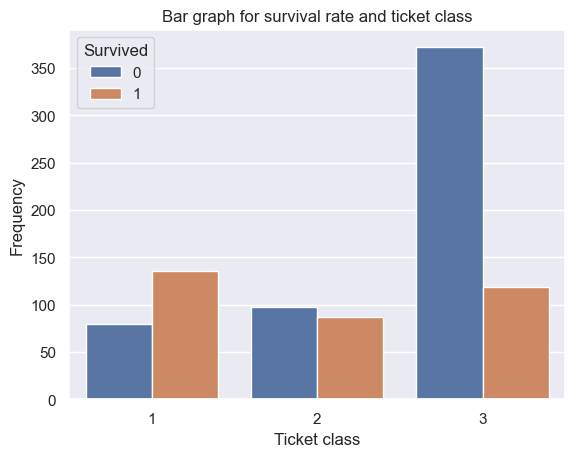

In [6]:
sns.barplot(x = "Pclass", y = "count",hue = 'Survived', data = sivived_by_pclass)
plt.title("Bar graph for survival rate and ticket class")
plt.xlabel("Ticket class")
plt.ylabel("Frequency")
plt.savefig('../results/bar_survived_pclass.png')

**Chi-Square test for survived rate and class of passenger:**

In [14]:
ct_table_survive_pclass = pd.crosstab(df["Survived"],df["Pclass"])
print('contingency_table :\n',ct_table_survive_pclass)

contingency_table :
 Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


In [15]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_survive_pclass)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     102.89
p-value:            4.5493e-23
degrees of freedom: 2
expected frequencies:
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


**5. Determine if the survival rate is associated to the gender**

In [23]:
#Determine the survival rate is associated to gender

sivived_by_sex = pd.DataFrame(df.groupby('Sex')['Survived'].value_counts())
sivived_by_sex

count
Sex    Survived       
female 1           233
       0            81
male   0           468
       1           109

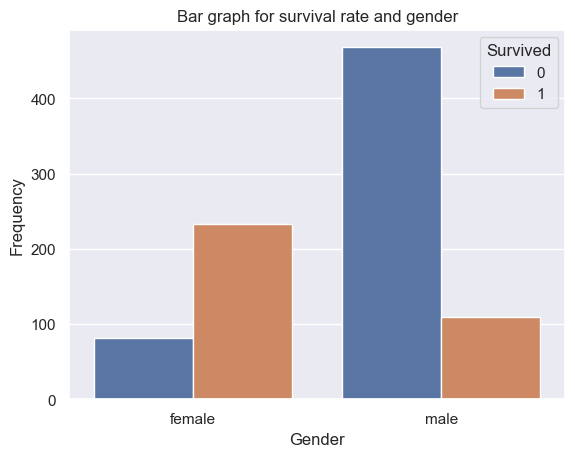

In [24]:
sns.barplot(x = "Sex", y = "count",hue = 'Survived', data = sivived_by_sex)
plt.title("Bar graph for survival rate and gender")
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.savefig('../results/bar_survived_gender.png')

**Chi-Square test for survived rate and gender:**

In [11]:
ct_table_survive_gender = pd.crosstab(df["Survived"],df["Sex"])
print('contingency_table :\n',ct_table_survive_gender)

contingency_table :
 Sex       female  male
Survived              
0             81   468
1            233   109


In [13]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_survive_gender)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     260.72
p-value:            1.1974e-58
degrees of freedom: 1
expected frequencies:
 [[193.47474747 355.52525253]
 [120.52525253 221.47474747]]


**6. Determine the survival rate is associated to the age**

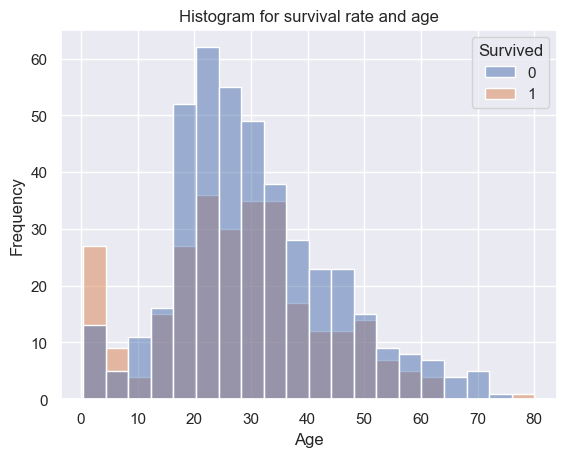

In [25]:
#Survived vs Age
sns.histplot(x = "Age",data=df_age, hue = 'Survived')
plt.title("Histogram for survival rate and age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.savefig('../results/hist_survived_age.png')

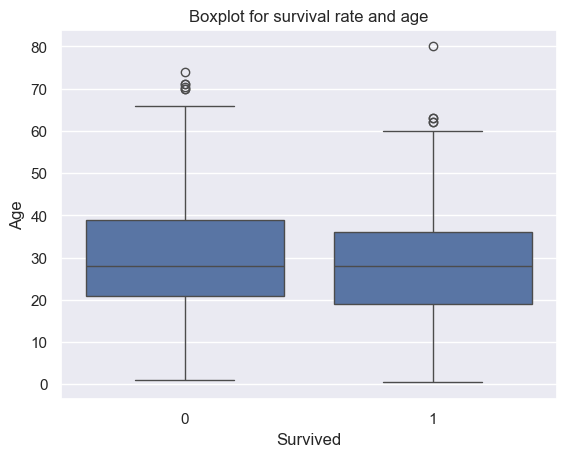

In [26]:
sns.boxplot(x="Survived", y="Age", data=df_age)
plt.title("Boxplot for survival rate and age")
plt.xlabel("Survived")
plt.ylabel("Age")
plt.savefig('../results/boxplot_survived_age.png')